# CNN 알고리즘

* Convolution 계층
* Pooling 계층

* 위의 두 계층이 반복

* FCL

In [1]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

print(tf.__version__)

2.6.0


In [2]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3),
                        activation="relu", input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation= "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [4]:
train_images = X_train.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = X_test.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [5]:
%%time

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 36s 6ms/step - loss: 0.1996 - accuracy: 0.9396
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0645 - accuracy: 0.9810
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0435 - accuracy: 0.9869
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0337 - accuracy: 0.9897
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0255 - accuracy: 0.9923
CPU times: user 27.7 s, sys: 4.63 s, total: 32.3 s
Wall time: 1min 22s


In [6]:
# SGDClassifier
%%time

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0139 - accuracy: 0.9963
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0128 - accuracy: 0.9966
Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0124 - accuracy: 0.9968
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0120 - accuracy: 0.9969
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0118 - accuracy: 0.9970
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0115 - accuracy: 0.9971
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0113 - accuracy: 0.9971
Epoch 8/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0111 - accuracy: 0.9972
Epoch 9/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0109 - accuracy: 0.9973
Epoch 10/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0108 - accuracy: 0.9973

In [5]:
model = models.Sequential()
model.add( layers.Conv2D(32, (3,3),
                         activation='relu', input_shape=(28,28,1))  )
model.add( layers.MaxPooling2D( (2,2) ))
model.add( layers.Conv2D(32, (3,3),
                         activation='relu', input_shape=(28,28,1))  )
model.add( layers.MaxPooling2D( (2,2) ))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [8]:
# SGDClassifier
%%time

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
938/938 [==============================] - 6s 6ms/step - loss: 0.8355 - accuracy: 0.7539
Epoch 2/20
938/938 [==============================] - 6s 6ms/step - loss: 0.2472 - accuracy: 0.9252
Epoch 3/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1681 - accuracy: 0.9505
Epoch 4/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1308 - accuracy: 0.9602
Epoch 5/20
938/938 [==============================] - 6s 6ms/step - loss: 0.1093 - accuracy: 0.9668
Epoch 6/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0959 - accuracy: 0.9710
Epoch 7/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0862 - accuracy: 0.9737
Epoch 8/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0797 - accuracy: 0.9753
Epoch 9/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0726 - accuracy: 0.9780
Epoch 10/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0685 - accuracy: 0.9790

# 고양이와 개의 분류 CNN을 이용해서 구현하기

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

import numpy as np
import matplotlib.pyplot as plt

In [8]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
print(path_to_zip)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print(PATH)

68616192/68606236 [==============================] - 1s 0us/step
/root/.keras/datasets/cats_and_dogs.zip
/root/.keras/datasets/cats_and_dogs_filtered


In [9]:
## 리눅스
!ls -ltr /root/.keras/datasets/
!ls -ltr /root/.keras/datasets/cats_and_dogs_filtered

total 78228
-rw-r--r-- 1 root root 11490434 Nov  8 04:33 mnist.npz
-rw-r--r-- 1 root root 68606236 Nov  8 05:11 cats_and_dogs.zip
drwxr-xr-x 4 root root     4096 Nov  8 05:11 cats_and_dogs_filtered
total 12
-rw-r--r-- 1 root root  140 Nov  8 05:11 vectorize.py
drwxr-xr-x 4 root root 4096 Nov  8 05:11 validation
drwxr-xr-x 4 root root 4096 Nov  8 05:11 train


In [10]:
train_dir = os.path.join(PATH, 'train')            # 학습용
validation_dir = os.path.join(PATH, 'validation')  # 평가용
print(train_dir)
print(validation_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [11]:
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures

print("개 : ", train_dogs_dir)
print("고양이 : ", train_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures

print("개 : ", validation_dogs_dir)
print("고양이 : ", validation_cats_dir)

개 :  /root/.keras/datasets/cats_and_dogs_filtered/train/dogs
고양이 :  /root/.keras/datasets/cats_and_dogs_filtered/train/cats
개 :  /root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
고양이 :  /root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [12]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [13]:
## 이미지 개수
print('Total training cat images:', num_cats_tr)  # 고양이
print('Total training dog images:', num_dogs_tr)  # 개
print("--")

print('Total validation cat images:', num_cats_val)  # 고양이
print('Total validation dog images:', num_dogs_val)  # 개
print("--")

print("Total training images:", total_train)  #  학습용 = 개 + 고양이
print("Total validation images:", total_val)  #  평가용 = 개 + 고양이

Total training cat images: 1000
Total training dog images: 1000
--
Total validation cat images: 500
Total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [17]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [18]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [20]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size, 
                                                           directory=train_dir,
                                                           shuffle=True, 
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="binary",
                                                           seed=42)

Found 2000 images belonging to 2 classes.


In [23]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, 
                                                           directory=validation_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="binary",
                                                           seed=42)

Found 1000 images belonging to 2 classes.


In [24]:
type(train_data_gen), train_data_gen

(keras.preprocessing.image.DirectoryIterator,
 <keras.preprocessing.image.DirectoryIterator at 0x7f74fb1cfa10>)

In [25]:
sample_training_images, _ = next(train_data_gen)
sample_training_images.shape  # 이미지 추출

(128, 150, 150, 3)

In [26]:
# 이 함수는 이미지를 plot를 하는 함수.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

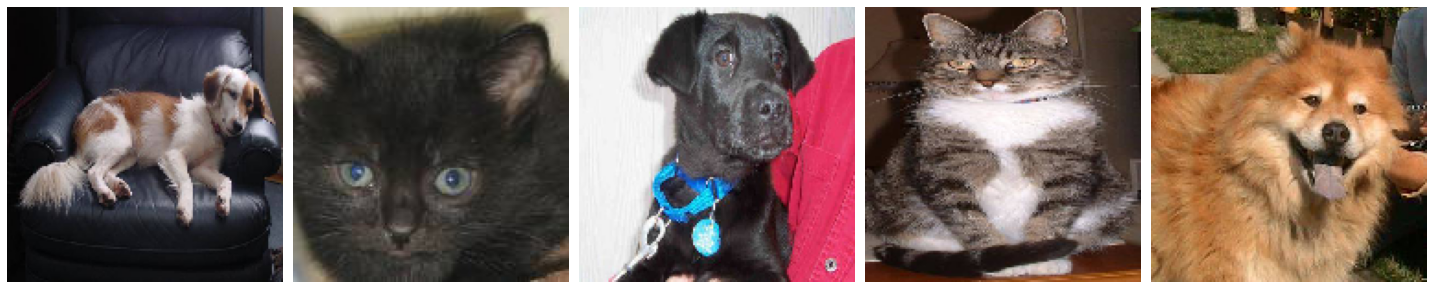

In [27]:
plotImages(sample_training_images[:5])

In [28]:
model = Sequential( [
        Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3) ),
        MaxPooling2D(),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),  # 은닉층
        Dense(1, activation='sigmoid')
] )

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 43808)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               22430208  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
%%time

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
15/15 [==============================] - 41s 674ms/step - loss: 2.6793 - accuracy: 0.5027 - val_loss: 0.6940 - val_accuracy: 0.5067
Epoch 2/15
15/15 [==============================] - 9s 625ms/step - loss: 0.6914 - accuracy: 0.5534 - val_loss: 0.6912 - val_accuracy: 0.5547
Epoch 3/15
15/15 [==============================] - 9s 625ms/step - loss: 0.6838 - accuracy: 0.5785 - val_loss: 0.6819 - val_accuracy: 0.5580
Epoch 4/15
15/15 [==============================] - 9s 633ms/step - loss: 0.6523 - accuracy: 0.6437 - val_loss: 0.6445 - val_accuracy: 0.6484
Epoch 5/15
15/15 [==============================] - 9s 628ms/step - loss: 0.6032 - accuracy: 0.6923 - val_loss: 0.6265 - val_accuracy: 0.6607
Epoch 6/15
15/15 [==============================] - 9s 630ms/step - loss: 0.4922 - accuracy: 0.7821 - val_loss: 0.5996 - val_accuracy: 0.7009
Epoch 7/15
15/15 [==============================] - 9s 631ms/step - loss: 0.3952 - accuracy: 0.8451 - val_loss: 0.5891 - val_accuracy: 0.6987
Epoch

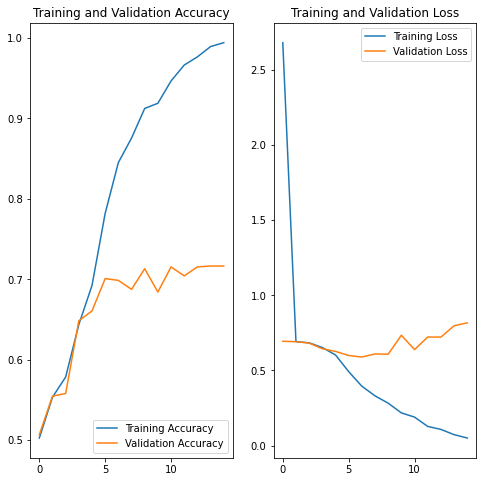

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()